## Chapter 8 - Computer vision Cats vs  Dogs
### Practice Notebook
---
*by Pablo Bauer*

#### **1. Importando librerias**
---

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import shutil
import pathlib
import matplotlib.pyplot as plt
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

from google.colab import files

#### **2. Descargando la BBDD de "cats_vs_dogs" desde kaggle**
---

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pablobauer","key":"2ddee82bb4e0530db3d900eb10e97d64"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:21<00:00, 42.4MB/s]
100% 812M/812M [00:21<00:00, 39.5MB/s]


In [5]:
!unzip -qq dogs-vs-cats.zip

In [6]:
!unzip -qq train.zip

#### **3. Dividiendo y reduciendo los datos de entrenamiento**
---

In [7]:
original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
  for category in ('cat', 'dog'):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname, dst=dir / fname)

In [8]:
make_subset('train', start_index=0, end_index=1000)
make_subset('test', start_index=1000, end_index=1500)
make_subset('validation', start_index=1500, end_index=2500)


#### **4. Creando el modelo**
---

In [9]:
inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

#### **5. Compilando el modelo**
---

In [11]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#### **6. Procesamiento de datos**
---

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

In [13]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180,180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_dataset:
  print(f"printeando data {data_batch.shape}")
  print(f"printeando label  {labels_batch} y {labels_batch.shape}")
  break

printeando data (32, 180, 180, 3)
printeando label  [1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0] y (32,)


#### **7. Fiteo de datos**
---



In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convent_from_scratch.csv",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 20s 104ms/step - loss: 0.6977 - accuracy: 0.5100 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 94ms/step - loss: 0.6934 - accuracy: 0.5220 - val_loss: 0.8046 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 6s 90ms/step - loss: 0.6711 - accuracy: 0.5830 - val_loss: 0.6293 - val_accuracy: 0.6485
Epoch 4/30
63/63 [==============================] - 7s 105ms/step - loss: 0.6485 - accuracy: 0.6400 - val_loss: 0.6147 - val_accuracy: 0.6645
Epoch 5/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6024 - accuracy: 0.6685 - val_loss: 0.7586 - val_accuracy: 0.6305
Epoch 6/30
63/63 [==============================] - 5s 78ms/step - loss: 0.5858 - accuracy: 0.6950 - val_loss: 0.6203 - val_accuracy: 0.6280
Epoch 7/30
63/63 [==============================] - 7s 100ms/step - loss: 0.5620 - accuracy: 0.7100 - val_loss: 0.6090 - val_accuracy: 0.6770
Epoch 8/3

#### **8. Ploteo de datos**
---

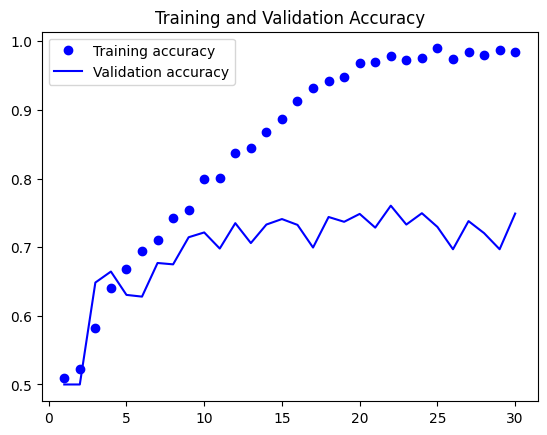

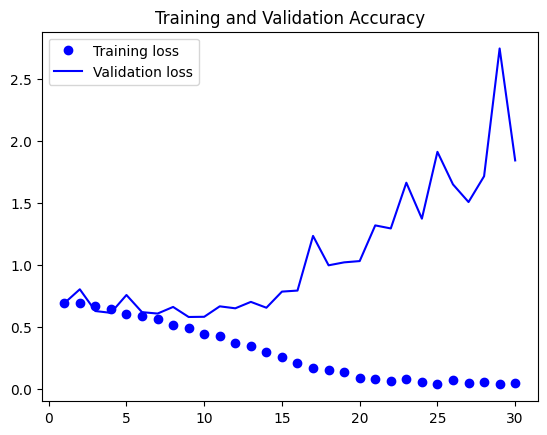

<Figure size 640x480 with 0 Axes>

In [16]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.show()

#### **9. Evaluando el modelo con el set de testeo**
---

In [17]:
test_model = keras.models.load_model("convent_from_scratch.csv")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy:  {test_acc:.3f}")

32/32 [==============================] - 2s 37ms/step - loss: 0.5878 - accuracy: 0.6930
Test accuracy:  0.693


#### **10. Aumento de datos**
---

In [19]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

#### **11. Visualizando el aumento de datos**
---

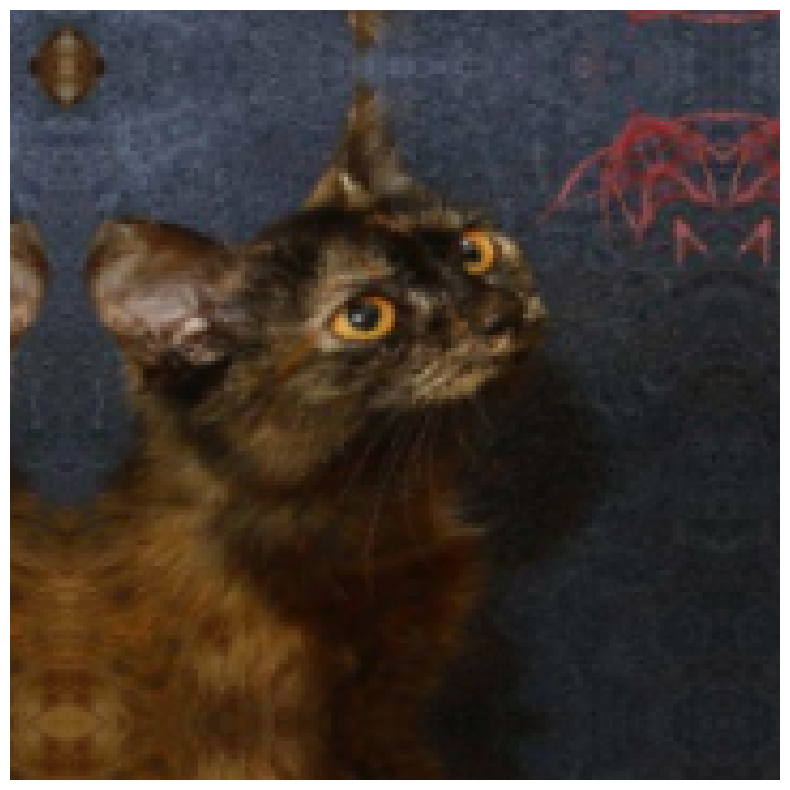

In [21]:
plt.figure(figsize=(10,10))

for images, _ in train_dataset.take(10):
  for i in range(9):
    augmentated_images = data_augmentation(images)
    plt.imshow(augmentated_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### **12. Recalculando el modelo con el aumento de datos**
---

In [22]:
input = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model= keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

#### **13. Entrenamiento del nuevo modelo con aumento de datos**
---

In [24]:
callbacks=[
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.csv",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 10s 107ms/step - loss: 0.7429 - accuracy: 0.5160 - val_loss: 0.7172 - val_accuracy: 0.5005
Epoch 2/100
63/63 [==============================] - 8s 118ms/step - loss: 0.6942 - accuracy: 0.5175 - val_loss: 0.6959 - val_accuracy: 0.5015
Epoch 3/100
63/63 [==============================] - 7s 113ms/step - loss: 0.6873 - accuracy: 0.5785 - val_loss: 0.6865 - val_accuracy: 0.5810
Epoch 4/100
63/63 [==============================] - 5s 79ms/step - loss: 0.6490 - accuracy: 0.6210 - val_loss: 0.9150 - val_accuracy: 0.5330
Epoch 5/100
63/63 [==============================] - 7s 116ms/step - loss: 0.6206 - accuracy: 0.6575 - val_loss: 0.6215 - val_accuracy: 0.6385
Epoch 6/100
63/63 [==============================] - 7s 111ms/step - loss: 0.6107 - accuracy: 0.6575 - val_loss: 0.6100 - val_accuracy: 0.6510
Epoch 7/100
63/63 [==============================] - 7s 112ms/step - loss: 0.5973 - accuracy: 0.6930 - val_loss: 0.6055 - val_accuracy: 0.6635

#### **14. Ploteo de datos**
---

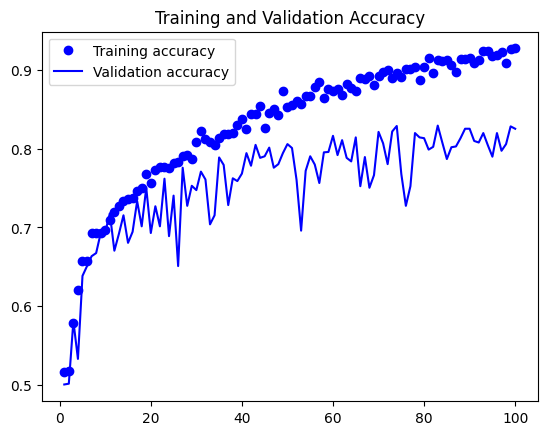

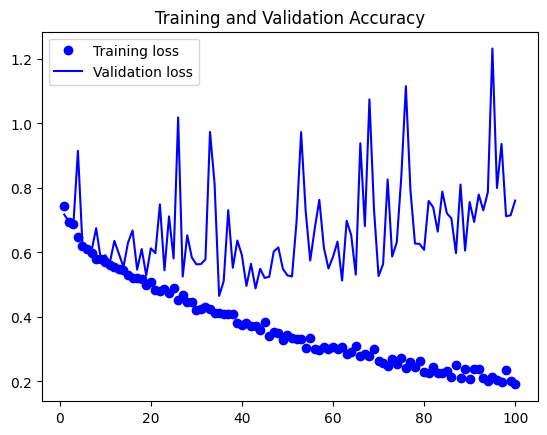

<Figure size 640x480 with 0 Axes>

In [25]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.show()

#### **15. Evaluando el modelo con el set de testeo**
---

In [26]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.csv")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy:  {test_acc:.3f}")

32/32 [==============================] - 2s 29ms/step - loss: 0.4526 - accuracy: 0.7830
Test accuracy:  0.783


#### **16. Modelos Preentrenados: Extracción de caracteristicas**
---

In [27]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180,180,3)
)

58889256/58889256 [==============================] - 10s 0us/step


In [28]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### **17. Extracción de datos rapida sin el aumento de datos**
---

In [29]:
import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []

  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)

  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 1s/step


In [30]:
 train_features.shape

(2000, 5, 5, 512)

#### **18. Definiendo y entrenando el clasificador densamente conectado**
---

In [34]:
inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [36]:
callbacks=[
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction.csv",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20
63/63 [==============================] - 2s 19ms/step - loss: 24.5369 - accuracy: 0.9180 - val_loss: 4.0627 - val_accuracy: 0.9665
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 2.8675 - accuracy: 0.9750 - val_loss: 9.2593 - val_accuracy: 0.9460
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 1.5128 - accuracy: 0.9870 - val_loss: 8.9878 - val_accuracy: 0.9595
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.8000 - accuracy: 0.9870 - val_loss: 5.0253 - val_accuracy: 0.9760
Epoch 5/20
63/63 [==============================] - 2s 34ms/step - loss: 1.3486 - accuracy: 0.9905 - val_loss: 3.8873 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3162 - accuracy: 0.9970 - val_loss: 5.0084 - val_accuracy: 0.9765
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0466 - accuracy: 0.9925 - val_loss: 7.1968 - val_accuracy: 0.9700
Epoch 8/20
63/63

#### **19. Ploteo de datos**
---

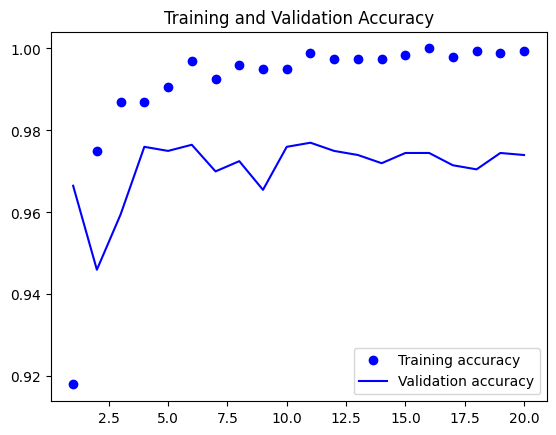

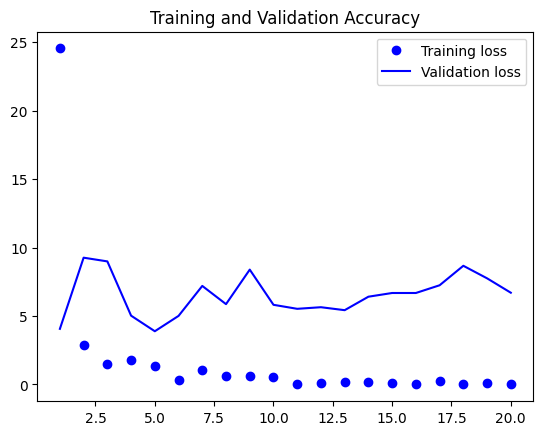

<Figure size 640x480 with 0 Axes>

In [37]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.show()

#### **20. Extracción de datos con el aumento de datos**
---

In [38]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)
conv_base.trainable=False

In [41]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
    )

In [43]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_data_augmentation.csv",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
63/63 [==============================] - 17s 247ms/step - loss: 22.7570 - accuracy: 0.8880 - val_loss: 5.1497 - val_accuracy: 0.9665
Epoch 2/50
63/63 [==============================] - 20s 317ms/step - loss: 6.0965 - accuracy: 0.9510 - val_loss: 3.1432 - val_accuracy: 0.9805
Epoch 3/50
63/63 [==============================] - 17s 259ms/step - loss: 7.1642 - accuracy: 0.9490 - val_loss: 4.4675 - val_accuracy: 0.9740
Epoch 4/50
63/63 [==============================] - 12s 194ms/step - loss: 4.5782 - accuracy: 0.9600 - val_loss: 7.2395 - val_accuracy: 0.9640
Epoch 5/50
63/63 [==============================] - 13s 205ms/step - loss: 2.7695 - accuracy: 0.9710 - val_loss: 4.2195 - val_accuracy: 0.9715
Epoch 6/50
63/63 [==============================] - 12s 193ms/step - loss: 3.8397 - accuracy: 0.9685 - val_loss: 3.9297 - val_accuracy: 0.9765
Epoch 7/50
63/63 [==============================] - 16s 258ms/step - loss: 4.2520 - accuracy: 0.9675 - val_loss: 4.6827 - val_accuracy: 0.972

#### **21. Ploteo de datos**
---

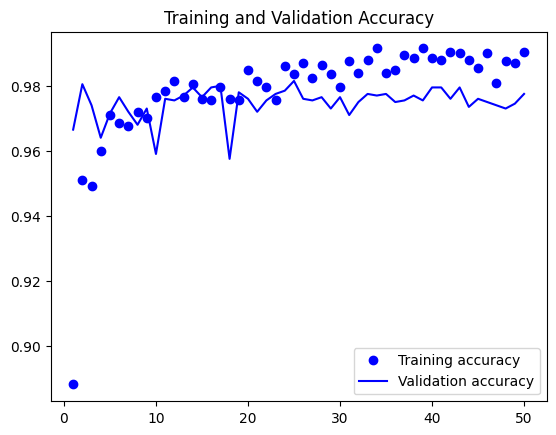

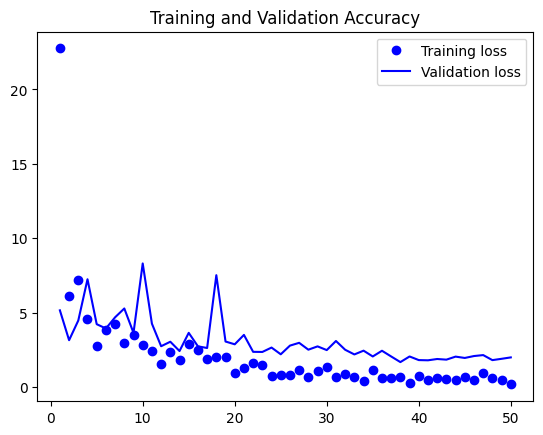

<Figure size 640x480 with 0 Axes>

In [44]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.show()

In [45]:
test_model = keras.models.load_model("features_extraction_with_data_augmentation.csv")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy:  {test_acc:.3f}")

32/32 [==============================] - 4s 94ms/step - loss: 1.8574 - accuracy: 0.9860
Test accuracy:  0.986


#### **22. Tuneo fino del modelo**
---

In [46]:
conv_base.trainable=True
for layer in conv_base.layers[:-4]:
  layer.trainable=False

In [49]:
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=["accuracy"]
)

In [50]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuneing.csv",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 18s 252ms/step - loss: 0.4014 - accuracy: 0.9905 - val_loss: 2.9038 - val_accuracy: 0.9730
Epoch 2/30
63/63 [==============================] - 16s 253ms/step - loss: 0.4765 - accuracy: 0.9905 - val_loss: 2.3950 - val_accuracy: 0.9745
Epoch 3/30
63/63 [==============================] - 16s 253ms/step - loss: 0.4261 - accuracy: 0.9920 - val_loss: 1.8423 - val_accuracy: 0.9755
Epoch 4/30
63/63 [==============================] - 13s 209ms/step - loss: 0.1563 - accuracy: 0.9965 - val_loss: 3.1146 - val_accuracy: 0.9675
Epoch 5/30
63/63 [==============================] - 13s 208ms/step - loss: 0.3965 - accuracy: 0.9880 - val_loss: 2.2399 - val_accuracy: 0.9745
Epoch 6/30
63/63 [==============================] - 13s 208ms/step - loss: 0.1421 - accuracy: 0.9940 - val_loss: 1.8646 - val_accuracy: 0.9750
Epoch 7/30
63/63 [==============================] - 16s 259ms/step - loss: 0.3426 - accuracy: 0.9905 - val_loss: 1.7336 - val_accuracy: 0.9765

#### **23. Ploteo de datos**
---

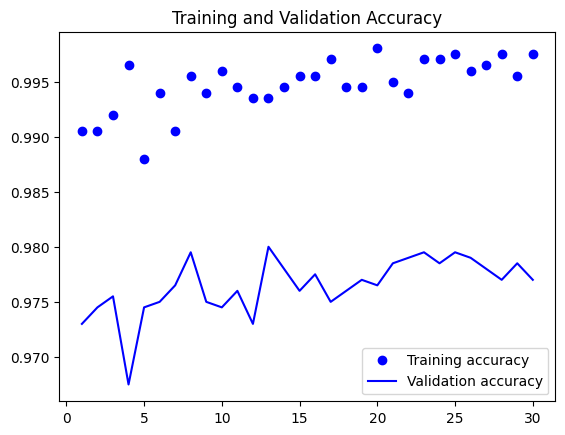

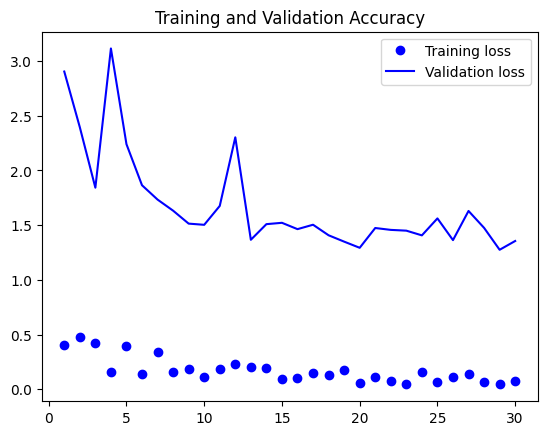

<Figure size 640x480 with 0 Axes>

In [51]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.show()

In [52]:
test_model = keras.models.load_model("fine_tuneing.csv")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy:  {test_acc:.3f}")

32/32 [==============================] - 3s 90ms/step - loss: 1.3081 - accuracy: 0.9830
Test accuracy:  0.983
